In [1]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv(r'D:\Documents\CODES\CS-THESIS\Practice code\Training Data.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df = df [["Score", "Text"]]
df = df.rename({"Text" : "Reviews"}, axis=1)
df.head()

,Score,Reviews
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [3]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

In [4]:
df.shape

(500, 2)

In [5]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
len(stop_words)

179

In [6]:
negative_words = {'no', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"}
stop_words = set(stop_words)

stop_words -= negative_words
len_stop_words = len(stop_words)

len(stop_words)

160

In [7]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile(r'[^\w\s]')
def text_cleaner(text):

    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = re.split(r'\s+', text.strip())
    cleaned_text = " ".join(word for word in text if word not in stop_words)
    return cleaned_text

In [8]:
print(df.columns)

Index(['Score', 'Reviews'], dtype='object')


In [9]:
df['Reviews'] = df['Reviews'].apply(text_cleaner)
conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['Overview'] = np.select(conditions, values)
df.head()

C:\Users\jeste\AppData\Local\Temp\ipykernel_6824\4127126769.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,Score,Reviews,Overview
0,5,bought several vitality canned dog food produc...,Positive
1,1,product arrived labeled jumbo salted peanuts p...,Negative
2,4,confection around centuries light pillowy citr...,Positive
3,2,looking secret ingredient robitussin believe f...,Negative
4,5,great taffy great price wide assortment yummy ...,Positive


<Axes: xlabel='Overview'>

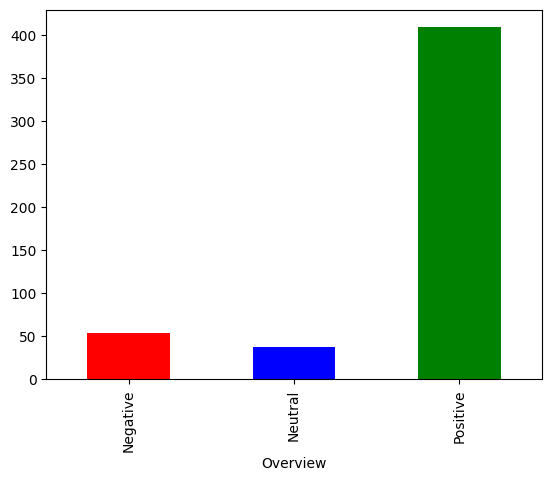

In [12]:
import matplotlib.pyplot as plt
df['Overview'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

In [14]:
x = df['Reviews'].values
y = df['Overview'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [15]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 43,  30, 327], dtype=int64))

In [16]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([11,  7, 82], dtype=int64))

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([
    ('tfidf',TfidfVectorizer()),('model',SVC())
])

text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array(['Positive'], dtype=object), array([100], dtype=int64))

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

82.0

In [20]:
confusion_matrix(y_pred,y_test)

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [11,  7, 82]], dtype=int64)

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.82      0.90       100

    accuracy                           0.82       100
   macro avg       0.33      0.27      0.30       100
weighted avg       1.00      0.82      0.90       100



C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le